In [ ]:
#Is price affected by factors such as neighborhood, #bathrooms, #bedrooms...

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
%matplotlib inline

pd.set_option('display.max_columns', None)

df = pd.read_csv('./Boston-listings.csv')
df.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",NaN,"The bus stop is 2 blocks away, and frequent. B...","You will have access to 2 bedrooms, a living r...",NaN,Clean up and treat the home the way you'd like...,https://a2.muscache.com/im/pictures/c0842db1-e...,https://a2.muscache.com/im/pictures/c0842db1-e...,https://a2.muscache.com/im/pictures/c0842db1-e...,https://a2.muscache.com/im/pictures/c0842db1-e...,31303940,https://www.airbnb.com/users/show/31303940,Virginia,2015-04-15,"Boston, Massachusetts, United States",We are country and city connecting in our deck...,NaN,NaN,NaN,f,https://a2.muscache.com/im/pictures/5936fef0-b...,https://a2.muscache.com/im/pictures/5936fef0-b...,Roslindale,1,1,"['email', 'phone', 'facebook', 'reviews']",t,f,"Birch Street, Boston, MA 02131, United States",Roslindale,Roslindale,NaN,Boston,MA,02131,Boston,"Boston, MA",US,United States,42.282619,-71.133068,t,House,Entire home/apt,4,1.5,2.0,3.0,Real Bed,"{TV,""Wireless Internet"",Kitchen,""Free Parking ...",NaN,$250.00,NaN,NaN,NaN,$35.00,1,$0.00,2,1125,2 weeks ago,NaN,0,0,0,0,2016-09-06,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN,NaN,f,moderate,f,f,1,NaN
1,3075044,https://www.airbnb.com/rooms/3075044,20160906204935,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...","If you don't have a US cell phone, you can tex...",Plenty of safe street parking. Bus stops a few...,Apt has one more bedroom (which I use) and lar...,"If I am at home, I am likely working in my hom...",Pet friendly but please confirm with me if the...,https://a1.muscache.com/im/pictures/39327812/d...,https://a1.muscache.com/im/pictures/39327812/d...,https://a1.muscache.com/im/pictures/39327812/d...,https://a1.muscache.com/im/pictures/39327812/d...,2572247,https://www.airbnb.com/users/show/2572247,Andrea,2012-06-07,"Boston, Massachusetts, United States",I live in Boston and I like to travel and have...,within an hour,100%,100%,f,https://a2.muscache.com/im/users/2572247/profi...,https://a2.muscache.com/im/users/2572247/profi...,Roslindale,1,1,"['email', 'phone', 'facebook', 'linkedin', 'am...",t,t,"Pinehurst Street, Boston, MA 02131, United Sta

In [14]:
def clean_data(df):
    '''
    INPUT
    df - pandas dataframe 
    
    OUTPUT
    X - A matrix holding all of the variables you want to consider when predicting the response
    y - the corresponding response vector
    
    This function cleans df using the following steps to produce X and y:
    1. Drop all the rows with no salaries
    2. Create X as all the columns that are not the Salary column
    3. Create y as the Salary column
    4. Drop the Salary, Respondent, and the ExpectedSalary columns from X
    5. For each numeric variable in X, fill the column with the mean value of the column.
    6. Create dummy columns for all the categorical variables in X, drop the original columns
    '''
    # Drop rows with missing salary values
    df = df.dropna(subset=['price'], axis=0)
    
    y = df['price']
    y=y.str.replace('[$,]', '')

    #Drop respondent and expected salary columns  
    df = df[['guests_included','property_type', 'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'square_feet', 'host_is_superhost']]

    # Fill numeric columns with the mean
    num_vars = df.select_dtypes(include=['float', 'int']).columns
    for col in num_vars:
        df[col].fillna((df[col].mean()), inplace=True)
    
    # Dummy the categorical variables
    cat_vars = df.select_dtypes(include=['object']).copy().columns
    for var in  cat_vars:
        # for each cat add dummy var, drop original column
        df = pd.concat([df.drop(var, axis=1), pd.get_dummies(df[var], prefix=var, prefix_sep='_', drop_first=True)], axis=1)
        
    X = df
    return X, y

#Use the function to create X and y
X, y = clean_data(df) 


/var/folders/nh/b503281s5qj68mghqwwb6xlw0000gn/T/ipykernel_43332/2553383091.py:22: FutureWarning: The default value of regex will change from True to False in a future version.
  y=y.str.replace('[$,]', '')


In [15]:
# Split data into training and test data, and fit a linear model
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=.15, random_state=42)
# pd.set_option("max_rows", None)
lm_2_model = LinearRegression(normalize=True)
# If our model works, it should just fit our model to the data. Otherwise, it will let us know.
try:
    lm_2_model.fit(X_train, y_train)
except Exception as e:
    print(e)

# Predictions here
y_test_preds = lm_2_model.predict(X_test)

r2_test = r2_score(y_test, y_test_preds)
print("R2 score =",r2_test)

mse = mean_squared_error(y_test, y_test_preds)
print("Mean Square error score =",mse)

R2 score = 0.15927373042866144
Mean Square error score = 34800.97066377955


/Users/georgekorovesis/Library/Python/3.8/lib/python/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(


/var/folders/nh/b503281s5qj68mghqwwb6xlw0000gn/T/ipykernel_43332/2553383091.py:22: FutureWarning: The default value of regex will change from True to False in a future version.
  y=y.str.replace('[$,]', '')


0       250.00
1        65.00
2        65.00
3        75.00
4        79.00
         ...  
3580     69.00
3581    150.00
3582    198.00
3583     65.00
3584     65.00
Name: price, Length: 3585, dtype: object
AxesSubplot(0.125,0.125;0.62x0.755)


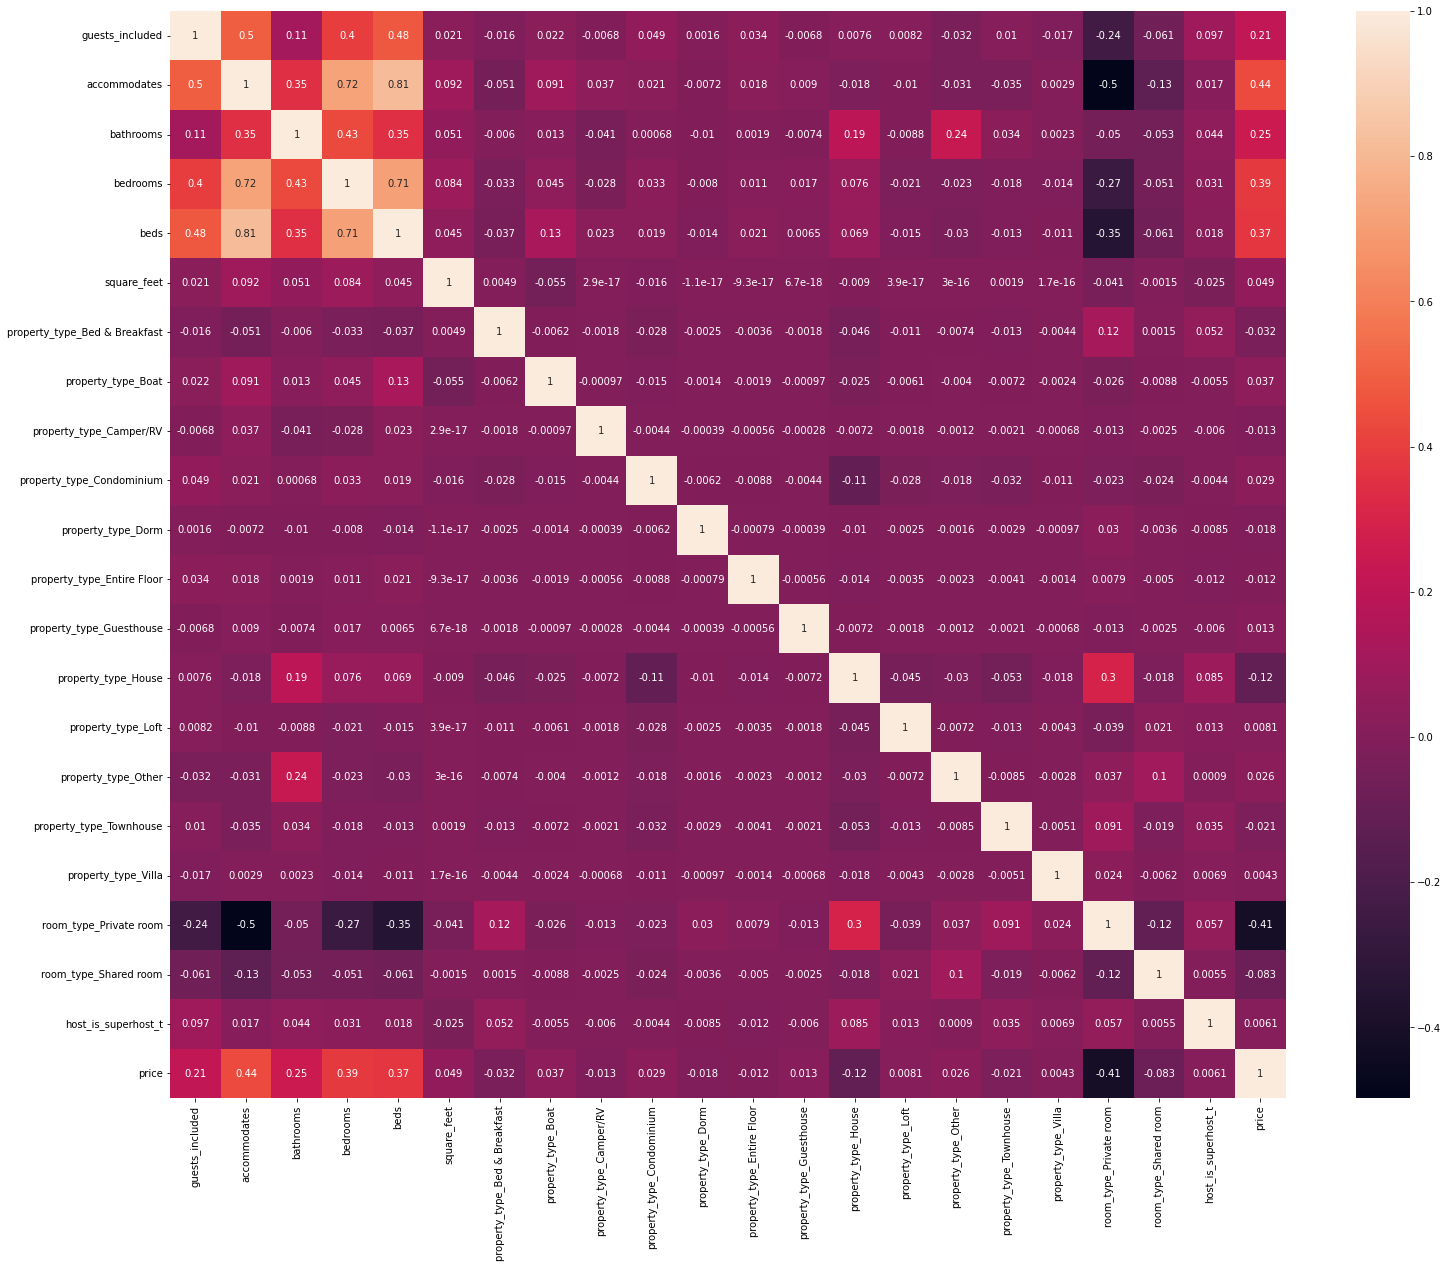

In [16]:
X,y = clean_data(df) 

print(y)
y = y.astype(float)
pd.set_option('display.width', 10000)
merged = X.merge(y.to_frame(), left_index=True, right_index=True)

plt.subplots(figsize=(25,20))
corr = merged.corr()
print(sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,annot=True))

In [17]:
def clean_data1(df):
    '''
    INPUT
    df - pandas dataframe 
    
    OUTPUT
    X - A matrix holding all of the variables you want to consider when predicting the response
    y - the corresponding response vector
    
    This function cleans df using the following steps to produce X and y:
    1. Drop all the rows with no salaries
    2. Create X as all the columns that are not the Salary column
    3. Create y as the Salary column
    4. Drop the Salary, Respondent, and the ExpectedSalary columns from X
    5. For each numeric variable in X, fill the column with the mean value of the column.
    6. Create dummy columns for all the categorical variables in X, drop the original columns
    '''
    # Drop rows with missing salary values
    df = df.dropna(subset=['price'], axis=0)
    
    y = df['price']
    y=y.str.replace('[$,]', '')

    #Drop respondent and expected salary columns  
    df = df[['host_neighbourhood', 'bathrooms', 'bedrooms', 'beds', 'square_feet']]

    # Fill numeric columns with the mean
    num_vars = df.select_dtypes(include=['float', 'int']).columns
    for col in num_vars:
        df[col].fillna((df[col].mean()), inplace=True)
    
    # Dummy the categorical variables
    cat_vars = df.select_dtypes(include=['object']).copy().columns
    for var in  cat_vars:
        # for each cat add dummy var, drop original column
        df = pd.concat([df.drop(var, axis=1), pd.get_dummies(df[var], prefix=var, prefix_sep='_', drop_first=True)], axis=1)
        
    X = df
    return X, y

#Use the function to create X and y
X, y = clean_data(df) 

/var/folders/nh/b503281s5qj68mghqwwb6xlw0000gn/T/ipykernel_43332/2553383091.py:22: FutureWarning: The default value of regex will change from True to False in a future version.
  y=y.str.replace('[$,]', '')


In [18]:
# Split data into training and test data, and fit a linear model
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=.15, random_state=42)
# pd.set_option("max_rows", None)
lm_2_model = LinearRegression(normalize=True)
# If our model works, it should just fit our model to the data. Otherwise, it will let us know.
try:
    lm_2_model.fit(X_train, y_train)
except Exception as e:
    print(e)

# Predictions here
y_test_preds = lm_2_model.predict(X_test)

r2_test = r2_score(y_test, y_test_preds)
print("R2 score =",r2_test)

mse = mean_squared_error(y_test, y_test_preds)
print("Mean Square error score =",mse)

R2 score = 0.15927373042866144
Mean Square error score = 34800.97066377955


/Users/georgekorovesis/Library/Python/3.8/lib/python/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(


/var/folders/nh/b503281s5qj68mghqwwb6xlw0000gn/T/ipykernel_43332/3150519303.py:22: FutureWarning: The default value of regex will change from True to False in a future version.
  y=y.str.replace('[$,]', '')


0       250.00
1        65.00
2        65.00
3        75.00
4        79.00
         ...  
3580     69.00
3581    150.00
3582    198.00
3583     65.00
3584     65.00
Name: price, Length: 3585, dtype: object
AxesSubplot(0.125,0.125;0.62x0.755)


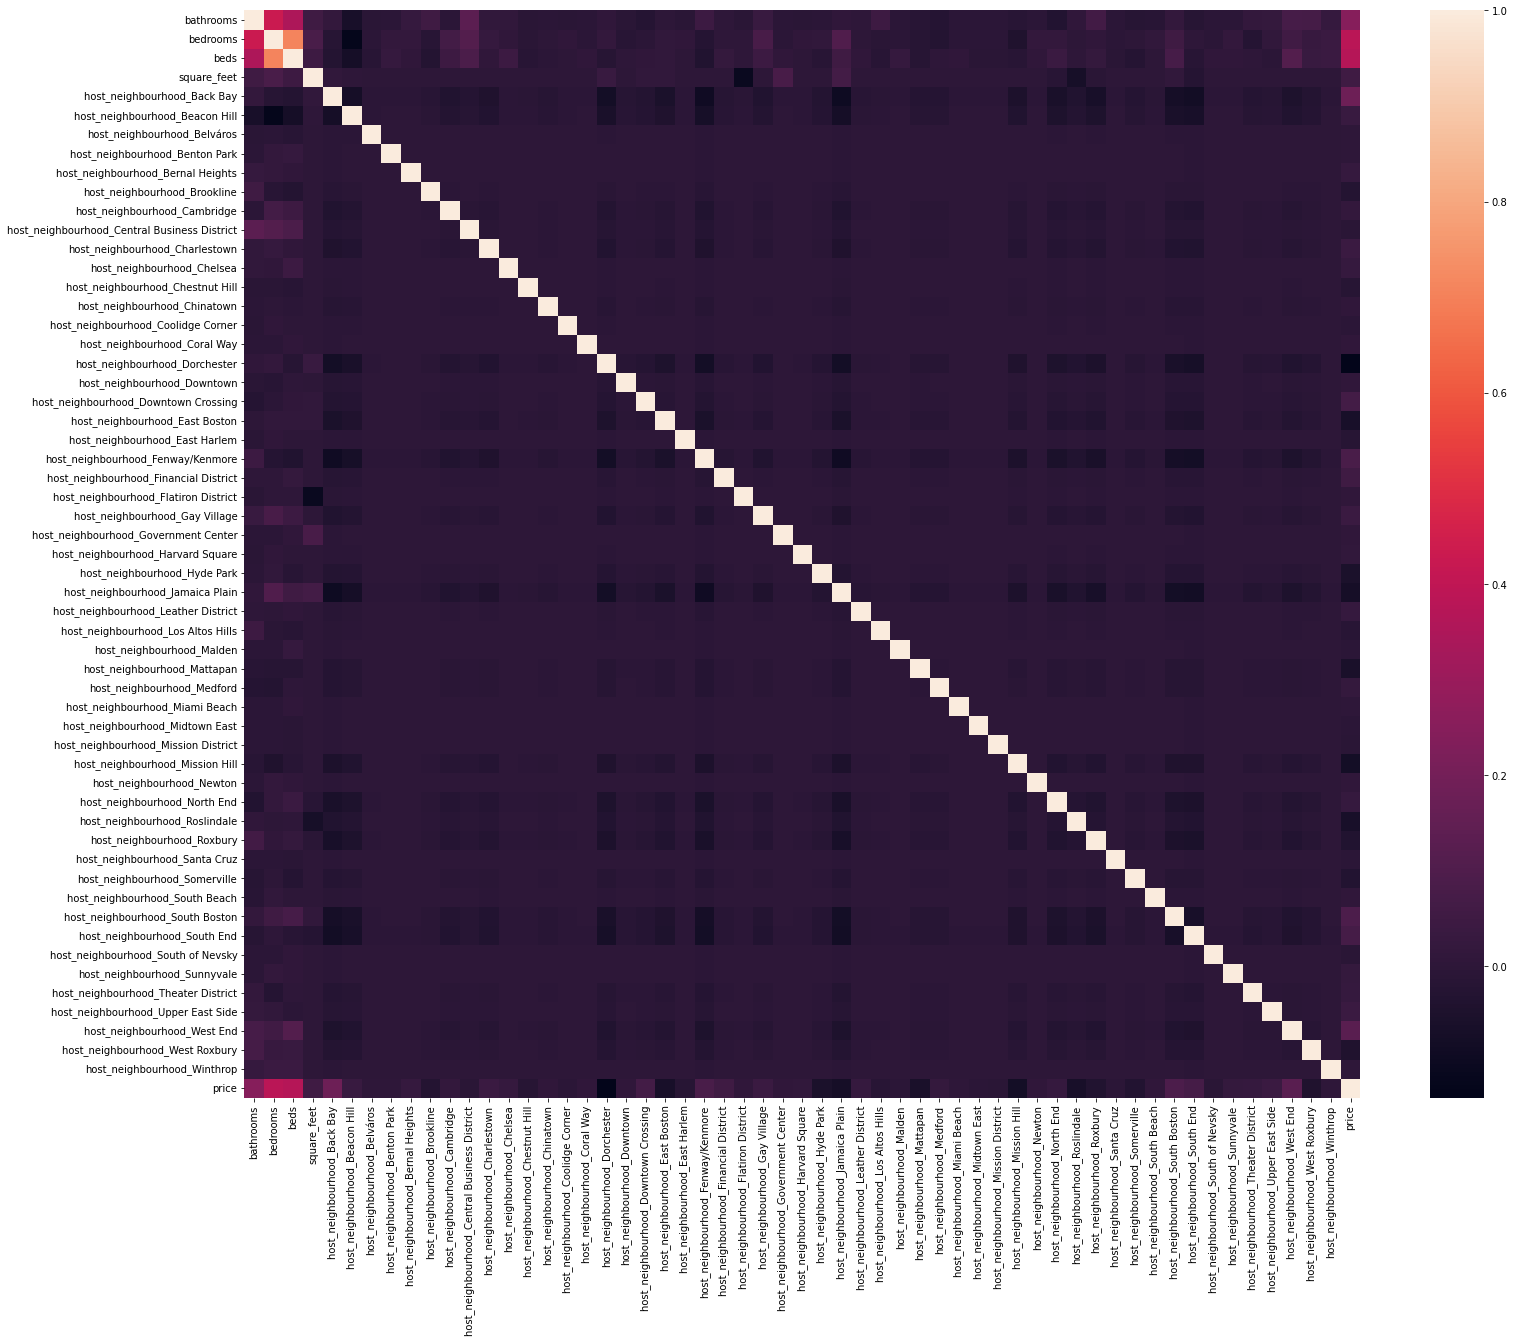

In [19]:
X,y = clean_data1(df) 

print(y)
y = y.astype(float)
pd.set_option('display.width', 10000)
merged = X.merge(y.to_frame(), left_index=True, right_index=True)

plt.subplots(figsize=(25,20))
corr = merged.corr()
print(sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns))